## Principal Components Analysis
### Basic Concept
* Find a low-dimensional representation of the data that captures as much of the information as possible. Each of the dimensions found of PCA is a linear combination of $p$ features.
* The first PC of features $X_1,X_2,...,X_p$ is:
\begin{aligned}
Z_1=\phi_{11}X_1+\phi_{21}X_2+...+\phi_{p1}X_p, \sum_{j=1}^p\phi_{j1}^2=1
\end{aligned}
which has the largest variance.
* Solve loading vectors
    * To find first PC loading vector $\Phi_1=\left\{\phi_{11}, \phi_{21}, ..., \phi_{p1}\right\}^T$ could be considered as solving the optimization problem below:
\begin{aligned}
\\ maximize & \left\{\frac{1}{n}\sum_{i=1}^n(\sum_{j=1}^p \phi_{j1} x_{ij})^2 \right\}
\\ & s.t. \sum_{j=1}^p\phi_{j1}^2=1
\end{aligned}
    * To find second PC loading vector: linear combination of $X_1,X_2,...,X_p$ that has maximal variance out of all linear combination that are uncorrelated with $Z_1$

### Example 1: Basic Understanding
Generate some random data from a 2-dimensional normal distribution. 

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import statistics
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

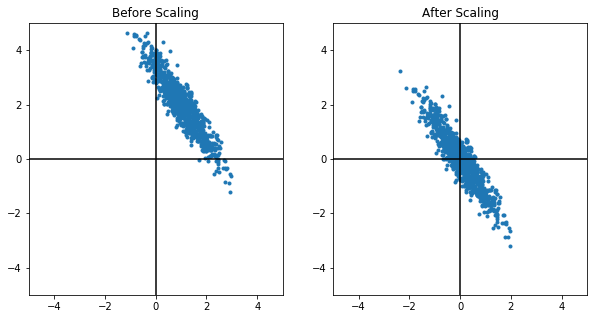

In [131]:
mean = [1, 2]
cov = [[0.5, -0.65], [-0.65, 1]]  # diagonal covariance
n=1000
x, y = np.random.multivariate_normal(mean, cov, n).T

basex = np.linspace(-5,5,100)
basey = np.linspace(0,0,100)

f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(x, y, '.')
ax1.set_title("Before Scaling")
ax1.set_ylim(-5, 5)
ax1.set_xlim(-5, 5)
ax1.plot(basex, basey,'k')
ax1.plot(basey, basex,'k')

xbar=statistics.mean(x)
ybar=statistics.mean(y)
x0=[i-xbar for i in x]
y0=[i-ybar for i in y]
ax2.plot(x0,y0, '.')
ax2.set_title("After Scaling")
ax2.set_ylim(-5, 5)
ax2.set_xlim(-5, 5)
ax2.plot(basex, basey,'k')
ax2.plot(basey, basex,'k')

Now I will find the first principal component which could describe the largest variance.

In [136]:
df = pd.DataFrame()
df['x']  = x0
df['y']  = y0
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'],index=['x','y'])
loadings

,PC1,PC2
x,-0.568456,0.822713
y,0.822713,0.568456


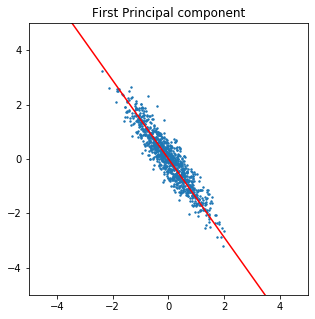

In [132]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals,'r')

    
plt.figure(figsize = (5,5))
plt.scatter(x0,y0,s=2)
plt.ylim(-5, 5)
plt.xlim(-5, 5)
abline(slope=loadings["PC1"][1]/loadings["PC1"][0],intercept=0)
plt.title("First Principal component")
plt.show()

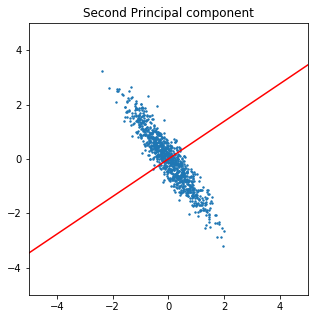

In [133]:
plt.figure(figsize = (5,5))
plt.scatter(x0,y0,s=2)
plt.ylim(-5, 5)
plt.xlim(-5, 5)
abline(slope=loadings["PC2"][1]/loadings["PC2"][0],intercept=0)
plt.title("Second Principal component")
plt.show()

Visualize the data in these two directions

In [138]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf[:5]

,principal component 1,principal component 2
0,-0.746576,0.106069
1,-0.131638,-0.323645
2,-1.891679,-0.102073
3,-1.641140,0.012212
4,-2.884233,0.017224


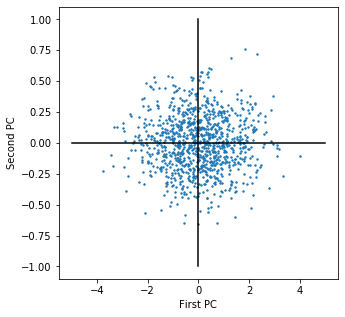

In [140]:
plt.figure(figsize = (5,5))
basex = np.linspace(-5,5,100)
basey = np.linspace(0,0,100)
basex1= np.linspace(-1,1,100)
plt.plot(basex, basey,'k')
plt.plot(basey, basex1,'k')
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],s=2)
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.show()

### Example 2: Iris Dataset

In [144]:
df = pd.read_csv("iris.data", names=['sepal length','sepal width','petal length','petal width','target'])

In [145]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [146]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

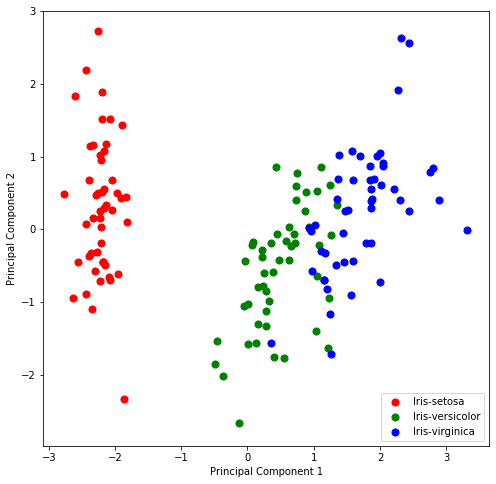

In [130]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)

In [147]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

The first PC explained 72.7% of the variance and the second principal component contains 23.03% of the variance.